In [26]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

The CIFAR-10 dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order.

Read more here: https://www.cs.toronto.edu/~kriz/cifar.html

In [27]:
(X_train, Y_train), (X_test,Y_test) = datasets.cifar10.load_data() #loading the dataset

In [28]:
X_train.shape

(50000, 32, 32, 3)

In [29]:
X_test.shape

(10000, 32, 32, 3)

As it can be seen, there are 50000 training images and 1000 test images.

In [30]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

For this work, we only need 1D array, that's why converting 2D array to 1D array.

In [35]:
Y_train=Y_train.reshape(-1,)

In [36]:
Y_test=Y_test.reshape(-1,)

In [37]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [38]:
def plot_index (X_train,Y_train,index):

  plt.figure(figsize=(15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[Y_train[index]])

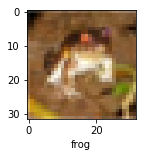

In [40]:
plot_index(X_train,Y_train,0)

Image has 3 channels (R,G,B) and each values in the channel can range from 0 to 255. We are normalizing the values to be in the range from 0 to 1.

In [9]:
# Normalizing the training data
X_train = X_train/255.0
X_test = X_test/255.0

## ANN Model

In [10]:
ann = models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(3000,activation='relu'),
                         layers.Dense(1000,activation='relu'),
                         layers.Dense(10,activation='softmax')
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
            
    
ann.fit(X_train,Y_train,epochs=5)

Epoch 1/5
50000/50000 [==============================] - 763s 15ms/step - loss: 1.8115 - acc: 0.3553
Epoch 2/5
50000/50000 [==============================] - 881s 18ms/step - loss: 1.6220 - acc: 0.4266
Epoch 3/5
50000/50000 [==============================] - 871s 17ms/step - loss: 1.5425 - acc: 0.4535
Epoch 4/5
50000/50000 [==============================] - 1005s 20ms/step - loss: 1.4829 - acc: 0.4777
Epoch 5/5
50000/50000 [==============================] - 1227s 25ms/step - loss: 1.4344 - acc: 0.4959


In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
Y_pred = ann.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print("Classification Report: \n", classification_report(Y_test, Y_pred_classes))

Classification Report: 
              precision    recall  f1-score   support

          0       0.47      0.66      0.55      1000
          1       0.58      0.65      0.61      1000
          2       0.39      0.24      0.30      1000
          3       0.34      0.38      0.36      1000
          4       0.32      0.57      0.41      1000
          5       0.61      0.15      0.24      1000
          6       0.46      0.66      0.54      1000
          7       0.59      0.48      0.53      1000
          8       0.60      0.62      0.61      1000
          9       0.70      0.30      0.42      1000

avg / total       0.51      0.47      0.46     10000



It's pretty clear that the ANN network is performing poorly because at the end of 5 epochs the accuracy is only 49.5%

## CNN Model

In [57]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [58]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(32,32,3)), # can detect 32 different filters or edges in images
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
    
])

https://mike-12.medium.com/sigmoid-or-softmax-d99578179b33

Difference between softmax and sigmoid function.

In [59]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
12576/50000 [======>.......................] - ETA: 2:56 - loss: 14.5233 - acc: 0.0988

# With CNN, at the end 6 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features.

In [18]:
cnn.evaluate(X_test,Y_test)

10000/10000 [==============================] - 14s 1ms/step


[0.9675891832351684, 0.6713]

In [51]:
Y_classes = [np.argmax(element) for element in Y_pred]
Y_classes[:5]

[3, 8, 0, 0, 4]

In [52]:
Y_test[:5]

array([3, 8, 8, 0, 6])

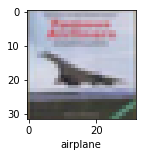

In [53]:
plot_index(X_test, Y_test,3)

In [54]:
classes[Y_classes[3]]

'airplane'

In [56]:
print("Classification Report: \n", classification_report(Y_test, Y_classes))

Classification Report: 
              precision    recall  f1-score   support

          0       0.47      0.66      0.55      1000
          1       0.58      0.65      0.61      1000
          2       0.39      0.24      0.30      1000
          3       0.34      0.38      0.36      1000
          4       0.32      0.57      0.41      1000
          5       0.61      0.15      0.24      1000
          6       0.46      0.66      0.54      1000
          7       0.59      0.48      0.53      1000
          8       0.60      0.62      0.61      1000
          9       0.70      0.30      0.42      1000

avg / total       0.51      0.47      0.46     10000

